# Boston 주택 가격 예측 모델

|feature	|설명|
|:---:|:---|
|CRIM|	자치시별 1인당 범죄율|
|ZN|	25,000 평방피트를 초과하는 거주지역의 비율|
|INDUS|	비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS|	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|	10ppm 당 농축 일산화질소|
|RM	주택| 1 가구당 평균 방의 개수|
|AGE|	1940년 이전에 건축된 소유주택의 비율|
|DIS|	5개의 보스턴 직업센터까지의 접근성 지수|
|RAD|	방사형 도로까지의 접근성 지수|
|TAX|	10,000 달러당 재산세율|
|PTRATIO|	자치시(town)별 학생/교사 비율|
|B|	자치시별 흑인의 비율을 말함|
|LSTAT|	모집단의 하위계층의 비율(%)|
|MEDV|	본인 소유의 주택가격(중앙값)(단위: $1,000)|

## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
feature_means = np.mean(train_data, axis=0)
train_data = train_data - feature_means

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
feature_stdev = np.std(train_data, axis=0)
train_data = train_data / feature_stdev

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
feature_means_test = np.mean(train_data, axis=0)
test_data = test_data - feature_means_test

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
feature_stdev_test = np.std(train_data, axis=0)
test_data = test_data / feature_stdev_test

## 모델 구성 및 컴파일

Sequential() 함수를 이용한 `Sequential API 방법`으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 입력 데이터의 shape 설정
input_shape = (train_data.shape[1], )

# 딥러닝 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

#model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))

# 모델 컴파일
model.compile(loss='mse',  # 회귀 문제이므로 평균 제곱 오차(MSE)를 사용
              optimizer='rmsprop',
              metrics=['mae']
             )  # 평가 지표로 평균 절대 오차(MAE)를 사용


## 모델 학습

epochs와 batch size는 자유롭게 설정해 보세요.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

early_stopping_cb = callbacks.EarlyStopping(
    patience=10, 
    monitor='val_loss',
    restore_best_weights=True
)

history = model.fit(train_data, train_labels,
                    epochs=100,  # 학습 에포크 수 설정
                    batch_size=16,  # 미니배치 크기 설정
                    validation_split=0.2,
                    callbacks=[early_stopping_cb])  # 검증 데이터 비율 설정


Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 508.1431 - mae: 20.6228 - val_loss: 494.8457 - val_mae: 20.3873
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 361.2597 - mae: 16.9605 - val_loss: 325.3681 - val_mae: 16.0547
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 205.0747 - mae: 12.0970 - val_loss: 172.4594 - val_mae: 10.7445
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 103.0439 - mae: 7.7463 - val_loss: 87.1061 - val_mae: 6.9843
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 56.1031 - mae: 5.5166 - val_loss: 51.6241 - val_mae: 5.2432
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 39.3268 - mae: 4.5676 - val_loss: 35.6329 - val_mae: 4.4109
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 30.2470 - mae: 3.9277 - val_loss: 28.6527 - val_mae: 3.9765
Epoch 8/100
21/21 [==============================] - 0s

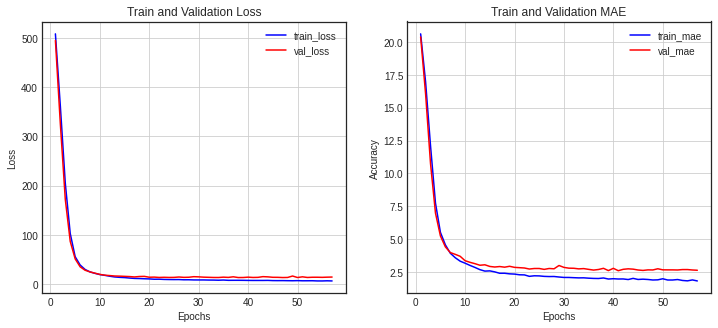

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
loss, mae = model.evaluate(test_data, test_labels)

print(f"평균 제곱 오차 (loss): {loss}")
print(f"평균 절대 오차 (MAE): {mae}")


4/4 [==============================] - 0s 2ms/step - loss: 6438619.0000 - mae: 2474.7410
평균 제곱 오차 (loss): 6438619.0
평균 절대 오차 (MAE): 2474.740966796875
